In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df1 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/CreatorsLab/instagram_spam/train.csv')
df2 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/CreatorsLab/instagram_spam/test.csv')

In [77]:
df1.head()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.27,0,0.0,0,53,0,0,32,1000,955,0
1,1,0.00,2,0.0,0,44,0,0,286,2740,533,0
2,1,0.10,2,0.0,0,0,0,1,13,159,98,0
3,1,0.00,1,0.0,0,82,0,0,679,414,651,0
4,1,0.00,2,0.0,0,0,0,1,6,151,126,0


In [4]:
df2.head()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.33,1,0.33,1,30,0,1,35,488,604,0
1,1,0.00,5,0.00,0,64,0,1,3,35,6,0
2,1,0.00,2,0.00,0,82,0,1,319,328,668,0
3,1,0.00,1,0.00,0,143,0,1,273,14890,7369,0
4,1,0.50,1,0.00,0,76,0,1,6,225,356,0


In [5]:
df1.isnull().sum()

profile pic             0
nums/length username    0
fullname words          0
nums/length fullname    0
name==username          0
description length      0
external URL            0
private                 0
#posts                  0
#followers              0
#follows                0
fake                    0
dtype: int64

In [7]:
df1[df1.duplicated()]

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
197,1,0.00,2,0.0,0,48,0,0,222,5282,652,0
525,1,0.91,1,0.0,0,0,0,0,0,75,26,1


In [78]:
df1.drop_duplicates(inplace=True)

In [9]:
df2.isnull().sum()

profile pic             0
nums/length username    0
fullname words          0
nums/length fullname    0
name==username          0
description length      0
external URL            0
private                 0
#posts                  0
#followers              0
#follows                0
fake                    0
dtype: int64

In [10]:
df2[df2.duplicated()]

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
67,0,0.00,1,0.0,1,0,0,0,0,69,694,1
83,1,0.27,1,0.0,0,0,0,0,0,45,64,1


In [79]:
df2.drop_duplicates(inplace=True)

In [12]:
df1.shape

(574, 12)

In [13]:
df2.shape

(118, 12)

In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 574 entries, 0 to 575
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   profile pic           574 non-null    int64  
 1   nums/length username  574 non-null    float64
 2   fullname words        574 non-null    int64  
 3   nums/length fullname  574 non-null    float64
 4   name==username        574 non-null    int64  
 5   description length    574 non-null    int64  
 6   external URL          574 non-null    int64  
 7   private               574 non-null    int64  
 8   #posts                574 non-null    int64  
 9   #followers            574 non-null    int64  
 10  #follows              574 non-null    int64  
 11  fake                  574 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 58.3 KB


In [16]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118 entries, 0 to 119
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   profile pic           118 non-null    int64  
 1   nums/length username  118 non-null    float64
 2   fullname words        118 non-null    int64  
 3   nums/length fullname  118 non-null    float64
 4   name==username        118 non-null    int64  
 5   description length    118 non-null    int64  
 6   external URL          118 non-null    int64  
 7   private               118 non-null    int64  
 8   #posts                118 non-null    int64  
 9   #followers            118 non-null    int64  
 10  #follows              118 non-null    int64  
 11  fake                  118 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 12.0 KB


<Axes: >

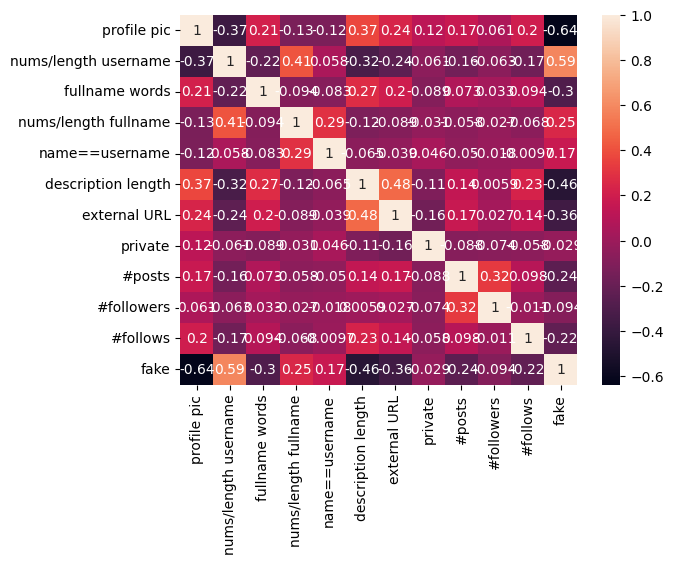

In [17]:
sns.heatmap(df1.corr(),annot=True)

In [80]:
X_train = df1.drop(columns=['fake'])
X_test = df2.drop(columns=['fake'])
y_train = df1['fake']
y_test = df2['fake']
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(574, 11) (118, 11) (574,) (118,)


In [81]:
# Logistic Regression Model
from sklearn.preprocessing import StandardScaler

scaler_x = StandardScaler()
X_train_scaled = scaler_x.fit_transform(X_train)
X_test_scaled = scaler_x.transform(X_test)

In [82]:
X_train_scaled

array([[ 0.65411061,  0.50580845, -1.38631564, ..., -0.1876001 ,
        -0.09286701,  0.48558343],
       [ 0.65411061, -0.76841447,  0.51283753, ...,  0.44372075,
        -0.09095687,  0.02615876],
       [ 0.65411061, -0.29648005,  0.51283753, ..., -0.23482489,
        -0.09379024, -0.4474188 ],
       ...,
       [ 0.65411061,  1.9216117 ,  0.51283753, ..., -0.25719453,
        -0.0938594 , -0.18504594],
       [ 0.65411061,  1.9216117 , -0.43673906, ..., -0.26713659,
        -0.09390222, -0.4746359 ],
       [ 0.65411061,  0.50580845, -0.43673906, ..., -0.26216556,
        -0.09380012, -0.0239207 ]])

In [83]:
X_test_scaled

array([[ 0.65411061,  0.7889691 , -0.43673906, ..., -0.18014356,
        -0.09342907,  0.10345533],
       [ 0.65411061, -0.76841447,  3.36156729, ..., -0.25968004,
        -0.09392637, -0.54757773],
       [ 0.65411061, -0.76841447,  0.51283753, ...,  0.52574275,
        -0.09360472,  0.17313111],
       ...,
       [ 0.65411061, -0.76841447,  0.51283753, ..., -0.25968004,
        -0.09305034,  3.3346696 ],
       [-1.52879341,  0.03387404, -0.43673906, ..., -0.26465107,
        -0.09372438,  1.29120963],
       [ 0.65411061,  1.30809696, -0.43673906, ..., -0.25968004,
        -0.09392198, -0.48007932]])

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
Logreg = LogisticRegression()
logreg_model = Logreg.fit(X_train_scaled,y_train)
y_train_pred = logreg_model.predict(X_train_scaled)
y_test_pred = logreg_model.predict(X_test_scaled)
print(f'Train Accuracy: {accuracy_score(y_train,y_train_pred)}')
print(f'Test Accuracy: {accuracy_score(y_test,y_test_pred)}')

Train Accuracy: 0.9094076655052264
Test Accuracy: 0.8728813559322034


In [85]:
logistic_train_accuracy = accuracy_score(y_train, y_train_pred)
logistic_test_accuracy = accuracy_score(y_test, y_test_pred)

In [86]:
cv_scores = cross_val_score(logreg_model, X_train_scaled, y_train, cv=5)
for i in cv_scores:
  print(i)
average_cv_score = cv_scores.mean()
print(f"Average cross-validation score: {average_cv_score:.2f}")

0.9565217391304348
0.8521739130434782
0.8260869565217391
0.9826086956521739
0.9298245614035088
Average cross-validation score: 0.91


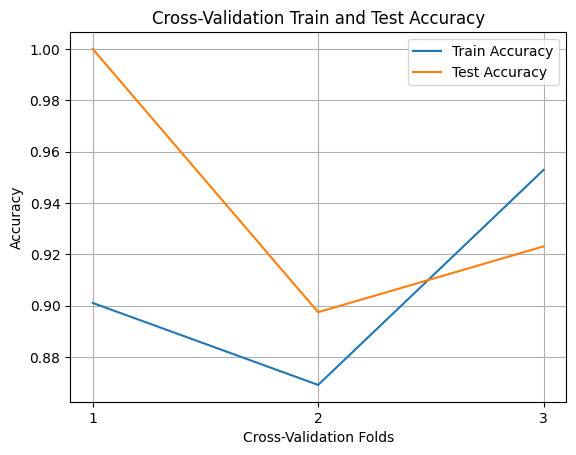

In [87]:
train_scores = cross_val_score(logreg_model, X_train_scaled, y_train, cv=3, scoring='accuracy')
test_scores = cross_val_score(logreg_model, X_test_scaled, y_test, cv=3, scoring='accuracy')

x_axis = list(range(len(train_scores)))

plt.plot(x_axis, train_scores, label='Train Accuracy')
plt.plot(x_axis, test_scores, label='Test Accuracy')
plt.xlabel('Cross-Validation Folds')
plt.ylabel('Accuracy')
plt.title('Cross-Validation Train and Test Accuracy')
plt.xticks(x_axis, np.arange(1, len(x_axis)+1))
plt.legend()
plt.grid(True)
plt.show()

In [88]:
# Random Forest Classifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

max_depth = [5, 10, 15, 20, None]
min_samples_split = [2, 5, 10, 20]
min_samples_leaf = [1, 2, 4, 8]
bootstrap = [True, False]
random_grid = {
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap
}

rfc = RandomForestClassifier(random_state=23)
rfc_random = RandomizedSearchCV(estimator=rfc, param_distributions=random_grid,
                                n_jobs=-1, scoring='accuracy', random_state=23,
                                cv=3, return_train_score=True)

rfc_random.fit(X_train, y_train)

rfc_train_accuracy = rfc_random.score(X_train, y_train)
rfc_test_accuracy = rfc_random.score(X_test, y_test)

print("Train Accuracy:", rfc_train_accuracy)
print("Test Accuracy:", rfc_test_accuracy)

Train Accuracy: 0.9425087108013938
Test Accuracy: 0.8983050847457628


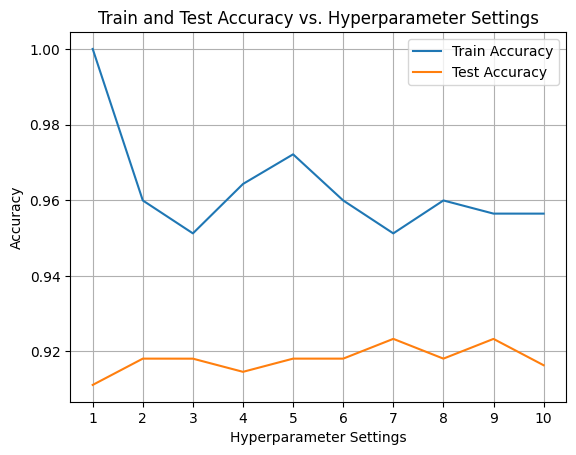

In [41]:
from pandas.io.formats.style_render import refactor_levels
rfc_train_accuracy = rfc_random.cv_results_['mean_train_score']
rfc_test_accuracy = rfc_random.cv_results_['mean_test_score']

x_axis = list(range(len(rfc_train_accuracy)))

plt.plot(x_axis, rfc_train_accuracy, label='Train Accuracy')
plt.plot(x_axis, rfc_test_accuracy, label='Test Accuracy')
plt.xlabel('Hyperparameter Settings')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracy vs. Hyperparameter Settings')
plt.xticks(x_axis, np.arange(1, len(x_axis)+1))
plt.legend()
plt.grid(True)
plt.show()

In [89]:
# XGBoost Classifier
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

param_grid = {
    'n_estimators': [int(i) for i in np.linspace(start=100, stop=3000, num=25)],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'reg_alpha': [0, 0.01, 0.1],
    'reg_lambda': [0, 0.01, 0.1],
    'scale_pos_weight': [1, 2]
}

xgbc = XGBClassifier(random_state=23, objective='binary:logistic')

xgbc_random = RandomizedSearchCV(estimator=xgbc, param_distributions=param_grid,
                                 n_jobs=-1, scoring='accuracy', random_state=23,
                                 cv=5, return_train_score=True, error_score='raise')

xgbc_random.fit(X_train, y_train)

xgbc_train_accuracy = xgbc_random.score(X_train, y_train)
xgbc_test_accuracy = xgbc_random.score(X_test, y_test)

print("Train Accuracy:", xgbc_train_accuracy)
print("Test Accuracy:", xgbc_test_accuracy)

Train Accuracy: 0.9634146341463414
Test Accuracy: 0.923728813559322


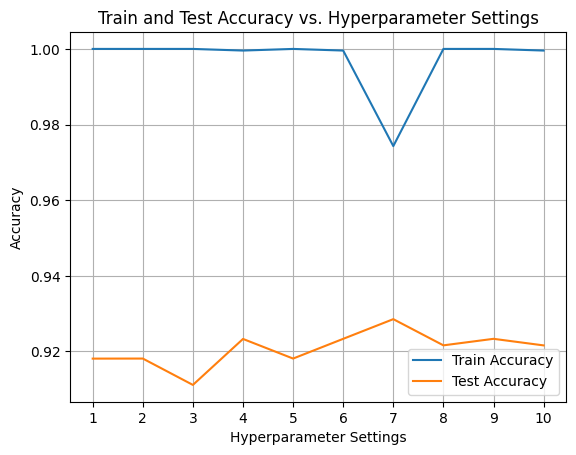

In [48]:
xgbc_train_accuracy = xgbc_random.cv_results_['mean_train_score']
xgbc_test_accuracy = xgbc_random.cv_results_['mean_test_score']

x_axis = list(range(len(xgbc_train_accuracy)))

plt.plot(x_axis, xgbc_train_accuracy, label='Train Accuracy')
plt.plot(x_axis, xgbc_test_accuracy, label='Test Accuracy')
plt.xlabel('Hyperparameter Settings')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracy vs. Hyperparameter Settings')
plt.xticks(x_axis, np.arange(1, len(x_axis)+1))
plt.legend()
plt.grid(True)
plt.show()

In [90]:
# AdaBoost Classifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier

n_estimators = [int(i) for i in np.linspace(start=120, stop=3000, num=20)]
learning_rate = [0.001, 0.01, 0.1, 0.2]
algorithm = ['SAMME', 'SAMME.R']
random_grid = {'n_estimators': n_estimators, 'learning_rate': learning_rate, 'algorithm': algorithm}

adbc = AdaBoostClassifier(random_state=23)
adbc_random = RandomizedSearchCV(estimator=adbc, param_distributions=random_grid, n_jobs=-1, scoring='accuracy',
                                 random_state=23, cv=3, return_train_score=True)
adbc_random.fit(X_train, y_train)

y_train_pred = adbc_random.predict(X_train)
y_test_pred = adbc_random.predict(X_test)

adbc_train_accuracy = accuracy_score(y_train, y_train_pred)
adbc_test_accuracy = accuracy_score(y_test, y_test_pred)

print("Train Accuracy:", adbc_train_accuracy)
print("Test Accuracy:", adbc_test_accuracy)

Train Accuracy: 0.9773519163763066
Test Accuracy: 0.9152542372881356


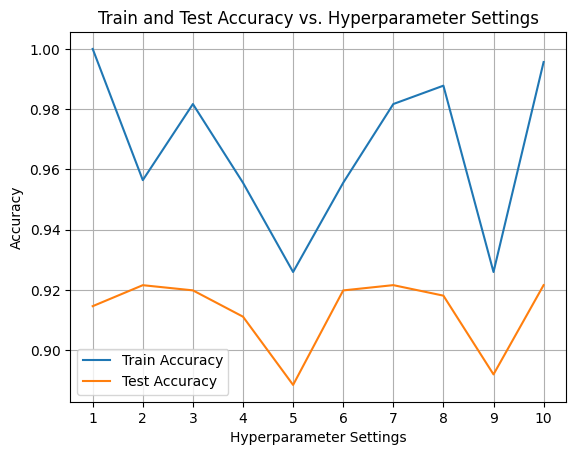

In [49]:
adbc_train_accuracy = adbc_random.cv_results_['mean_train_score']
adbc_test_accuracy = adbc_random.cv_results_['mean_test_score']

x_axis = np.arange(len(adbc_train_accuracy))
plt.plot(x_axis, adbc_train_accuracy, label='Train Accuracy')
plt.plot(x_axis, adbc_test_accuracy, label='Test Accuracy')
plt.xlabel('Hyperparameter Settings')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracy vs. Hyperparameter Settings')
plt.xticks(x_axis, np.arange(1, len(x_axis)+1))
plt.legend()
plt.grid(True)
plt.show()

Text(0, 0.5, 'Error Rate')

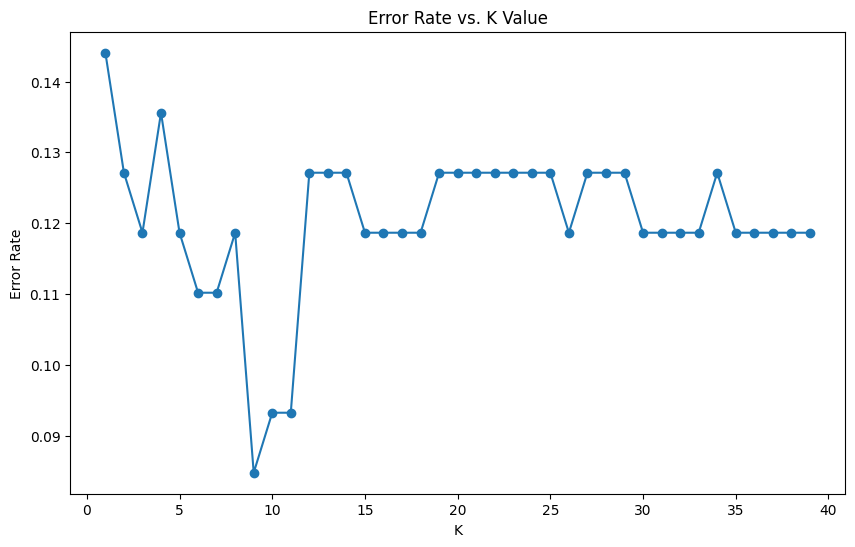

In [50]:
# KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_scaled,y_train)
    pred_i = knn.predict(X_test_scaled)
    error_rate.append(np.mean(pred_i != y_test))
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,marker='o')
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [91]:
knn = KNeighborsClassifier(n_neighbors=16)
knn_model = knn.fit(X_train,y_train)
y_train_pred = knn_model.predict(X_train_scaled)
y_test_pred = knn_model.predict(X_test_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [92]:
knn_train_accuracy = accuracy_score(y_train, y_train_pred)
knn_test_accuracy = accuracy_score(y_test, y_test_pred)

print("Train Accuracy:", knn_train_accuracy)
print("Test Accuracy:", knn_test_accuracy)

Train Accuracy: 0.5
Test Accuracy: 0.4915254237288136


In [93]:
# SVM Classifier
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

random_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1],
    'kernel': ['linear', 'rbf', 'poly']
}

svc = SVC(random_state=23, probability=True)

grid = RandomizedSearchCV(svc, random_grid, refit=True, verbose=3, cv=3)
svc_best = grid.fit(X_train_scaled, y_train)

y_train_pred = svc_best.predict(X_train_scaled)
y_test_pred = svc_best.predict(X_test_scaled)

svc_train_accuracy = accuracy_score(y_train, y_train_pred)
svc_test_accuracy = accuracy_score(y_test, y_test_pred)

print("Train Accuracy:", svc_train_accuracy)
print("Test Accuracy:", svc_test_accuracy)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3] END .....C=100, gamma=0.1, kernel=poly;, score=0.885 total time=   0.0s
[CV 2/3] END .....C=100, gamma=0.1, kernel=poly;, score=0.832 total time=   0.0s
[CV 3/3] END .....C=100, gamma=0.1, kernel=poly;, score=0.864 total time=   0.0s
[CV 1/3] END ....C=0.1, gamma=0.01, kernel=poly;, score=0.609 total time=   0.0s
[CV 2/3] END ....C=0.1, gamma=0.01, kernel=poly;, score=0.497 total time=   0.0s
[CV 3/3] END ....C=0.1, gamma=0.01, kernel=poly;, score=0.503 total time=   0.0s
[CV 1/3] END ...C=0.01, gamma=0.01, kernel=poly;, score=0.609 total time=   0.0s
[CV 2/3] END ...C=0.01, gamma=0.01, kernel=poly;, score=0.497 total time=   0.0s
[CV 3/3] END ...C=0.01, gamma=0.01, kernel=poly;, score=0.497 total time=   0.0s
[CV 1/3] END C=0.01, gamma=0.001, kernel=linear;, score=0.880 total time=   0.0s
[CV 2/3] END C=0.01, gamma=0.001, kernel=linear;, score=0.838 total time=   0.0s
[CV 3/3] END C=0.01, gamma=0.001, kernel=linear;

In [94]:
# ANN Model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(50, input_dim=11, activation='relu'))
model.add(Dense(150, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(150, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(25, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(2, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 50)                600       
                                                                 
 dense_13 (Dense)            (None, 150)               7650      
                                                                 
 dropout_8 (Dropout)         (None, 150)               0         
                                                                 
 dense_14 (Dense)            (None, 150)               22650     
                                                                 
 dropout_9 (Dropout)         (None, 150)               0         
                                                                 
 dense_15 (Dense)            (None, 100)               15100     
                                                                 
 dropout_10 (Dropout)        (None, 100)              

In [95]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes = 2)
y_test = tf.keras.utils.to_categorical(y_test, num_classes = 2)

In [96]:
from tensorflow.keras.callbacks import EarlyStopping
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
epochs_hist = model.fit(X_train_scaled, y_train, epochs=100, verbose=1,
                        validation_split=0.1, callbacks=[early_stopping])

Epoch 1/100
17/17 [==============================] - 4s 24ms/step - loss: 0.6658 - accuracy: 0.6163 - val_loss: 0.7224 - val_accuracy: 0.5690
Epoch 2/100
17/17 [==============================] - 0s 10ms/step - loss: 0.5430 - accuracy: 0.7829 - val_loss: 0.6069 - val_accuracy: 0.7759
Epoch 3/100
17/17 [==============================] - 0s 9ms/step - loss: 0.3962 - accuracy: 0.8682 - val_loss: 0.2374 - val_accuracy: 0.8966
Epoch 4/100
17/17 [==============================] - 0s 9ms/step - loss: 0.3264 - accuracy: 0.9012 - val_loss: 0.1906 - val_accuracy: 0.9138
Epoch 5/100
17/17 [==============================] - 0s 10ms/step - loss: 0.2698 - accuracy: 0.9031 - val_loss: 0.1739 - val_accuracy: 0.8966
Epoch 6/100
17/17 [==============================] - 0s 6ms/step - loss: 0.2713 - accuracy: 0.9070 - val_loss: 0.1902 - val_accuracy: 0.8966
Epoch 7/100
17/17 [==============================] - 0s 6ms/step - loss: 0.2409 - accuracy: 0.9147 - val_loss: 0.1774 - val_accuracy: 0.9138
Epoch 8/10

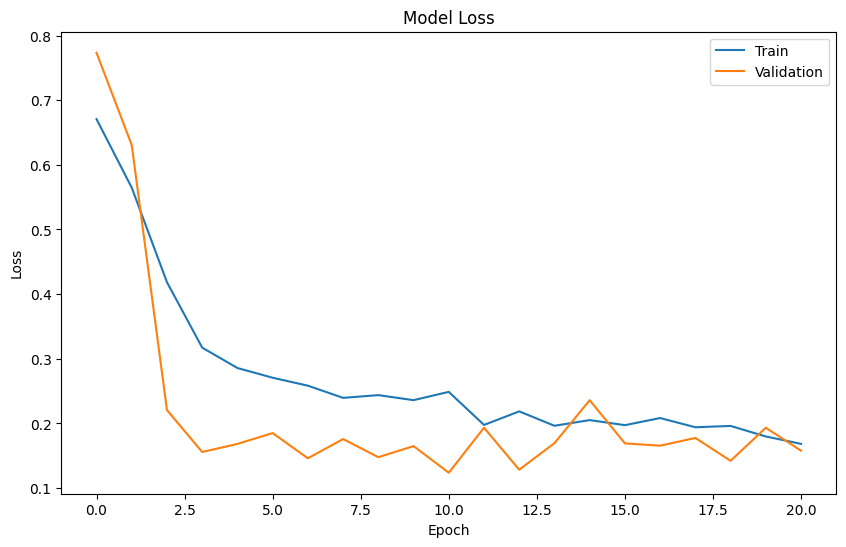

In [67]:
plt.figure(figsize=(10, 6))
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

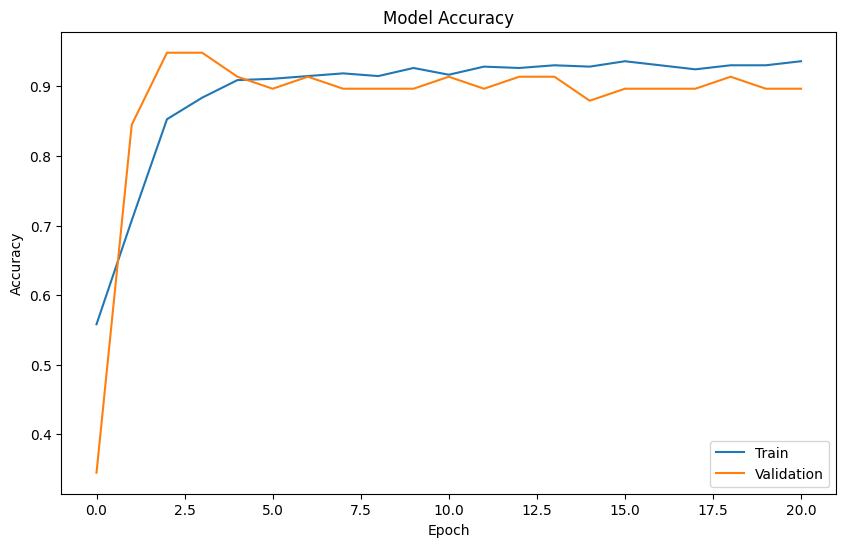

In [68]:
plt.figure(figsize=(10, 6))
plt.plot(epochs_hist.history['accuracy'])
plt.plot(epochs_hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

In [97]:
test_loss, ann_test_accuracy = model.evaluate(X_test_scaled, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", ann_test_accuracy)

4/4 [==============================] - 0s 9ms/step - loss: 0.2593 - accuracy: 0.9153
Test Loss: 0.2593463361263275
Test Accuracy: 0.9152542352676392


In [98]:
model_names = ['Logistic Regression', 'Random Forest', 'XGBoost', 'AdaBoost', 'SVC', 'KNN', 'ANN']
test_accuracies = [logistic_test_accuracy, rfc_test_accuracy, xgbc_test_accuracy,
                   adbc_test_accuracy, svc_test_accuracy, knn_test_accuracy,
                   ann_test_accuracy]

accuracy_df = pd.DataFrame({'Model': model_names, 'Test Accuracy': test_accuracies})

accuracy_df = accuracy_df.sort_values(by='Test Accuracy', ascending=False)

print(accuracy_df)

                 Model  Test Accuracy
2              XGBoost       0.923729
3             AdaBoost       0.915254
6                  ANN       0.915254
1        Random Forest       0.898305
0  Logistic Regression       0.872881
4                  SVC       0.864407
5                  KNN       0.491525


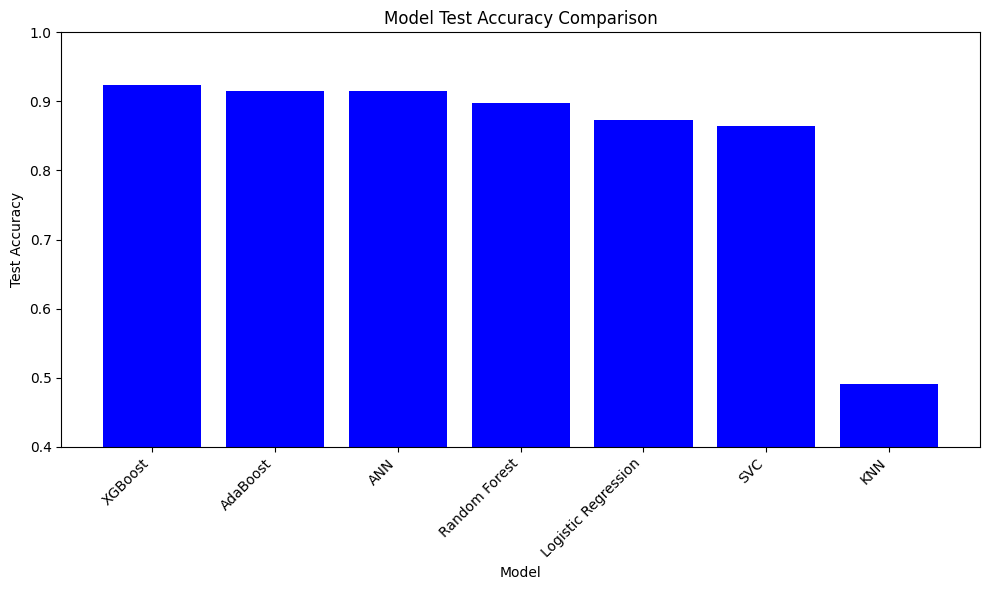

In [99]:
model_names = ['XGBoost', 'AdaBoost', 'ANN', 'Random Forest', 'Logistic Regression', 'SVC', 'KNN']
test_accuracies = [0.923729, 0.915254, 0.915254, 0.898305, 0.872881, 0.864407, 0.491525]

plt.figure(figsize=(10, 6))
plt.bar(model_names, test_accuracies, color='blue')
plt.xlabel('Model')
plt.ylabel('Test Accuracy')
plt.title('Model Test Accuracy Comparison')
plt.xticks(rotation=45, ha='right')
plt.ylim(0.4, 1.0)
plt.tight_layout()

plt.show()

XGBoost is performing the best when compared to all the other models and hence we are selecting the XGBoost classifier as our final model for deployment

In [100]:
import joblib

best_xgbc_model = xgbc_random.best_estimator_
model_filename = '/content/drive/My Drive/Colab Notebooks/CreatorsLab/instagram_spam/model/xgbc_model.pkl'
joblib.dump(best_xgbc_model, model_filename)
print("Best XGBoost Classifier model saved successfully.")

Best XGBoost Classifier model saved successfully.


In [121]:
loaded_model = joblib.load('/content/drive/My Drive/Colab Notebooks/CreatorsLab/instagram_spam/model/xgbc_model.pkl')

num_samples = 3
random_indices = np.random.choice(X_test_scaled.shape[0], num_samples, replace=False)
sample_X = X_test_scaled[random_indices]
sample_y_actual = y_test[random_indices]

sample_y_pred_probs = loaded_model.predict_proba(sample_X)

for i in range(num_samples):
    actual_label = np.argmax(sample_y_actual[i])
    predicted_label = np.argmax(sample_y_pred_probs[i])
    predicted_prob = sample_y_pred_probs[i][predicted_label]

    print(f"Actual: {actual_label}, Predicted: {predicted_label}, Predicted Probability: {predicted_prob:.4f}")

Actual: 1, Predicted: 1, Predicted Probability: 0.9017
Actual: 1, Predicted: 1, Predicted Probability: 0.9909
Actual: 0, Predicted: 1, Predicted Probability: 0.8828
